In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv("final_df.csv")
df.head()

,survey_Date,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,...,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality,country_name
0,25-03-2020,33.9031,-118.1494,500,male,50_60,184,4.382027,3.161247,ap,...,0,0,0,0,0,0,0,100.0,0.194,United States
1,26-03-2020,52.0218,4.5357,5,female,80_90,164,4.430817,3.440418,ap,...,0,0,0,1,0,0,0,100.0,3.483,Netherlands
2,28-03-2020,-26.8740,-48.7028,10,female,20_30,170,4.158883,3.095578,ap,...,0,0,0,0,0,0,0,100.0,0.050,Brazil
3,27-03-2020,47.1921,8.1766,20,male,90_100,132,4.820282,4.264087,op,...,0,0,1,0,0,0,0,100.0,13.973,Switzerland
4,27-03-2020,40.5733,-111.9107,5,male,30_40,184,4.770685,3.549617,op,...,0,1,0,1,1,0,0,100.0,0.116,United States


In [106]:
print(df.columns)

Index(['survey_Date', 'ip_latitude', 'ip_longitude', 'ip_accuracy', 'sex',
       'age', 'height', 'weight', 'bmi', 'blood_type', 'insurance', 'income',
       'race', 'immigrant', 'smoking', 'contacts_count', 'house_count',
       'public_transport_count', 'working', 'worried', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease',
       'diabetes', 'hiv_positive', 'hypertension', 'other_chronic',
       'nursing_home', 'health_worker', 'risk_infection', 'risk_mortality',
       'country_name'],
      dtype='object')


In [107]:
df['public_transport_count'].unique()

array([ 0.,  1.,  3.,  2., 12.,  8.,  6., 11.,  4., 13., 14., 10.,  5.,
       15.,  7.])

In [108]:
df['covid19_positive'].unique()

array([1, 0], dtype=int64)

In [109]:
df_trimmed = df.drop(columns=['survey_Date', 'ip_latitude', 'ip_longitude', 'ip_accuracy', 'height', 'weight', 'insurance', 'income', 'immigrant', 'contacts_count', 'house_count', 'risk_infection'])
df_trimmed.columns

Index(['sex', 'age', 'bmi', 'blood_type', 'race', 'smoking',
       'public_transport_count', 'working', 'worried', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease',
       'diabetes', 'hiv_positive', 'hypertension', 'other_chronic',
       'nursing_home', 'health_worker', 'risk_mortality', 'country_name'],
      dtype='object')

In [110]:
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sex                     5109 non-null   object 
 1   age                     5109 non-null   object 
 2   bmi                     5109 non-null   float64
 3   blood_type              5109 non-null   object 
 4   race                    5109 non-null   object 
 5   smoking                 5109 non-null   object 
 6   public_transport_count  5109 non-null   float64
 7   working                 5109 non-null   object 
 8   worried                 5109 non-null   float64
 9   covid19_positive        5109 non-null   int64  
 10  covid19_symptoms        5109 non-null   int64  
 11  covid19_contact         5109 non-null   int64  
 12  asthma                  5109 non-null   int64  
 13  kidney_disease          5109 non-null   int64  
 14  liver_disease           5109 non-null   

In [111]:
len(df_trimmed['country_name'].unique())

89

In [112]:
df_trimmed.isnull().sum()

sex                       0
age                       0
bmi                       0
blood_type                0
race                      0
smoking                   0
public_transport_count    0
working                   0
worried                   0
covid19_positive          0
covid19_symptoms          0
covid19_contact           0
asthma                    0
kidney_disease            0
liver_disease             0
compromised_immune        0
heart_disease             0
lung_disease              0
diabetes                  0
hiv_positive              0
hypertension              0
other_chronic             0
nursing_home              0
health_worker             0
risk_mortality            0
country_name              0
dtype: int64

In [183]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_encoded = df_trimmed
label_encode_columns = ['sex', 'age', 'blood_type', 'race', 'smoking', 'working', 'country_name']
for i in label_encode_columns:
    df_encoded[i]= label_encoder.fit_transform(df_encoded[i])
for i in df_encoded.columns:
    print(i)

sex
age
bmi
blood_type
race
smoking
public_transport_count
working
worried
covid19_positive
covid19_symptoms
covid19_contact
asthma
kidney_disease
liver_disease
compromised_immune
heart_disease
lung_disease
diabetes
hiv_positive
hypertension
other_chronic
nursing_home
health_worker
risk_mortality
country_name


In [114]:
df_encoded.head()

,sex,age,bmi,blood_type,race,smoking,public_transport_count,working,worried,covid19_positive,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_mortality,country_name
0,1,6,3.161247,3,6,0,0.0,2,4.0,1,...,0,0,0,0,0,0,0,0,0.194,88
1,0,9,3.440418,3,6,0,0.0,2,4.0,1,...,0,0,0,0,1,0,0,0,3.483,58
2,0,3,3.095578,3,6,0,0.0,2,4.0,1,...,0,0,0,0,0,0,0,0,0.050,11
3,1,10,4.264087,7,6,3,0.0,2,4.0,1,...,0,0,0,1,0,0,0,0,13.973,81
4,1,4,3.549617,7,6,0,0.0,2,4.0,1,...,0,0,1,0,1,1,0,0,0.116,88


In [115]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sex                     5109 non-null   int32  
 1   age                     5109 non-null   int32  
 2   bmi                     5109 non-null   float64
 3   blood_type              5109 non-null   int32  
 4   race                    5109 non-null   int32  
 5   smoking                 5109 non-null   int32  
 6   public_transport_count  5109 non-null   float64
 7   working                 5109 non-null   int32  
 8   worried                 5109 non-null   float64
 9   covid19_positive        5109 non-null   int64  
 10  covid19_symptoms        5109 non-null   int64  
 11  covid19_contact         5109 non-null   int64  
 12  asthma                  5109 non-null   int64  
 13  kidney_disease          5109 non-null   int64  
 14  liver_disease           5109 non-null   

In [116]:
df_encoded.columns

Index(['sex', 'age', 'bmi', 'blood_type', 'race', 'smoking',
       'public_transport_count', 'working', 'worried', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease',
       'diabetes', 'hiv_positive', 'hypertension', 'other_chronic',
       'nursing_home', 'health_worker', 'risk_mortality', 'country_name'],
      dtype='object')

In [117]:
df_encoded.shape

(5109, 26)

In [181]:
public_transport_count = df_encoded['public_transport_count'].unique()
for i in public_transport_count:
    print(i)

0.0
1.0
3.0
2.0
12.0
8.0
6.0
11.0
4.0
13.0
14.0
10.0
5.0
15.0
7.0


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


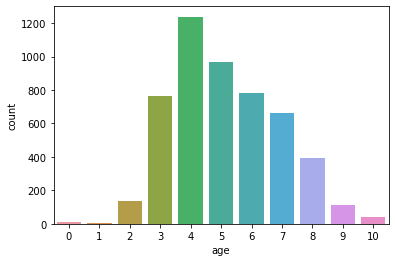

C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


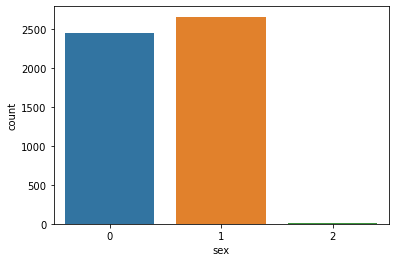

C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


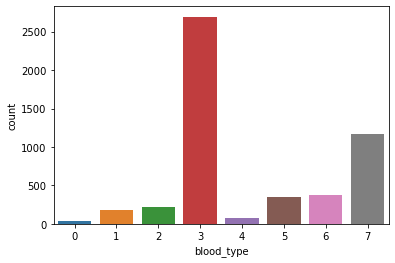

C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


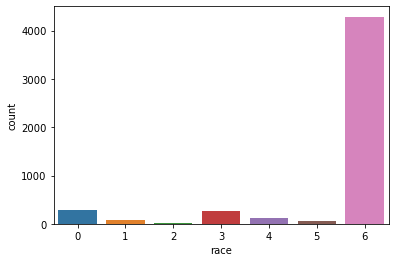

C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


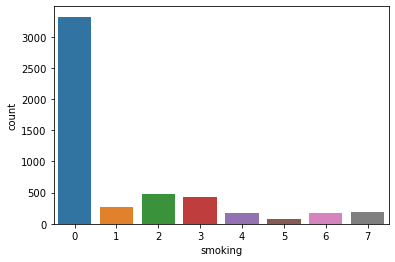

C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


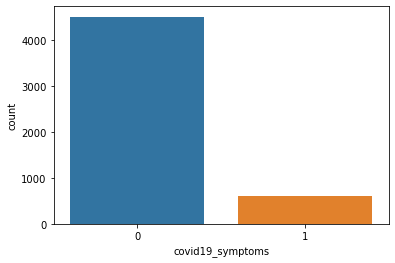

In [119]:
for i in ['age', 'sex', 'blood_type', 'race', 'smoking', 'covid19_symptoms']:
    sns.countplot(df_encoded[i])
    plt.show()

C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

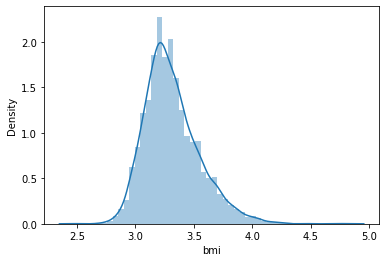

In [120]:
sns.distplot(df_encoded['bmi'])

In [178]:
class_columns = ['sex', 'age', 'blood_type', 'race', 'smoking', 'working', 'country_name']
for col_name in class_columns:
    actual_column_name, encoded_column_name = [], []
    actual_column_name = df[col_name].unique()
    encoded_column_name = df_encoded[col_name].unique()
    print("\n", "---------------------------", "\n", col_name)
    for i in range(len(actual_column_name)):
        print(actual_column_name[i],",", encoded_column_name[i])


 --------------------------- 
 sex
male , 1
female , 0
other , 2

 --------------------------- 
 age
50_60 , 6
80_90 , 9
20_30 , 3
90_100 , 10
30_40 , 4
40_50 , 5
60_70 , 7
10_20 , 2
70_80 , 8
0_10 , 0
100_110 , 1

 --------------------------- 
 blood_type
ap , 3
op , 7
abp , 1
bp , 5
on , 6
an , 2
abn , 0
bn , 4

 --------------------------- 
 race
white , 6
mixed , 4
blank , 2
black , 1
asian , 0
hispanic , 3
other , 5

 --------------------------- 
 smoking
never , 0
quit5 , 3
quit0 , 1
quit10 , 2
yesheavy , 5
vape , 4
yesmedium , 7
yeslight , 6

 --------------------------- 
 working
stopped , 2
home , 0
travel non critical , 4
travel critical , 3
never , 1

 --------------------------- 
 country_name
United States , 88
Netherlands , 58
Brazil , 11
Switzerland , 81
Spain , 79
Australia , 5
Russia , 72
Japan , 43
Malta , 51
Britain , 12
NewZealand , 59
Pakistan , 62
Chile , 16
Ireland , 40
Ukraine , 86
Canada , 14
India , 36
Belgium , 8
Bhutan , 9
Hungary , 35
Mexico , 53
Greece , 

In [121]:
## Doing a train Test Split.

X = df_encoded.drop(columns=['risk_mortality'])
y = df_encoded['risk_mortality']

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [157]:
print(X_train.iloc[12])
print(y_test.iloc[12])

sex                        0.000000
age                        4.000000
bmi                        3.514526
blood_type                 3.000000
race                       6.000000
smoking                    1.000000
public_transport_count     0.000000
working                    0.000000
worried                    4.000000
covid19_positive           1.000000
covid19_symptoms           0.000000
covid19_contact            0.000000
asthma                     0.000000
kidney_disease             0.000000
liver_disease              0.000000
compromised_immune         1.000000
heart_disease              0.000000
lung_disease               0.000000
diabetes                   0.000000
hiv_positive               0.000000
hypertension               0.000000
other_chronic              1.000000
nursing_home               0.000000
health_worker              0.000000
country_name              88.000000
Name: 1615, dtype: float64
0.05


In [140]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [141]:
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.16 degrees.


In [142]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.68 %.


In [143]:
# Exporting the Model.
import pickle
pickle_out = open("regressor.pkl", 'wb')
pickle.dump(regressor, pickle_out)
pickle_out.close()

In [ ]:
regressor.pickle([[]])